<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos-2024/blob/main/Tarea%20%234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea #4

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Cargamos el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
# Normalizamos los valores de los pixeles
x_train = x_train / 255.0
x_test = x_test / 255.0

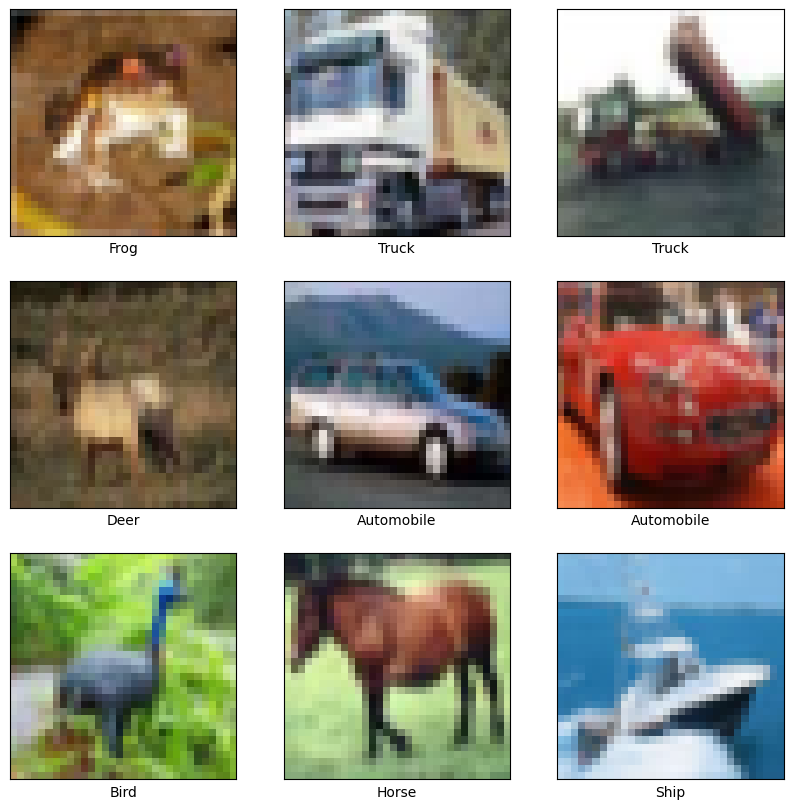

In [11]:
# Mostramos las primeras imágenes del conjunto de entrenamiento
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [12]:
# Nombres de las clases en el dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [13]:
# Crear el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [14]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 68s 42ms/step - loss: 1.7460 - accuracy: 0.3524 - val_loss: 1.5047 - val_accuracy: 0.4551
Epoch 2/40
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4160 - accuracy: 0.4934 - val_loss: 1.2709 - val_accuracy: 0.5429
Epoch 3/40
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2932 - accuracy: 0.5401 - val_loss: 1.1275 - val_accuracy: 0.6003
Epoch 4/40
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2008 - accuracy: 0.5792 - val_loss: 1.1440 - val_accuracy: 0.5863
Epoch 5/40
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1291 - accuracy: 0.6048 - val_loss: 1.0222 - val_accuracy: 0.6344
Epoch 6/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0663 - accuracy: 0.6262 - val_loss: 0.9759 - val_accuracy: 0.6600
Epoch 7/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0268 - accuracy: 0.6419 - val_loss: 0.9583 -

In [16]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 1.0345 - accuracy: 0.7194 - 4s/epoch - 12ms/step

Test accuracy: 0.7193999886512756


In [17]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

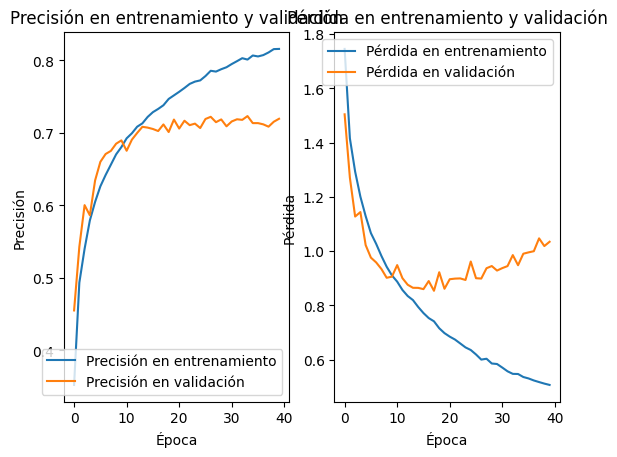

In [18]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Precisión en entrenamiento y validación')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.title('Pérdida en entrenamiento y validación')

plt.show()

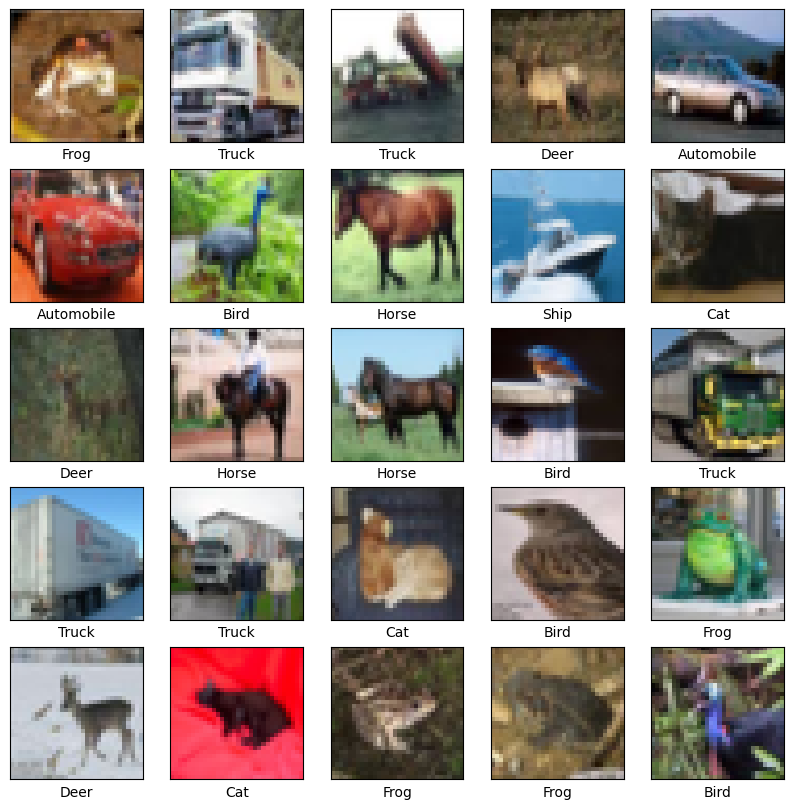

In [19]:
# Mostrar algunas imágenes del dataset con sus etiquetas
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

313/313 [==============================] - 4s 11ms/step


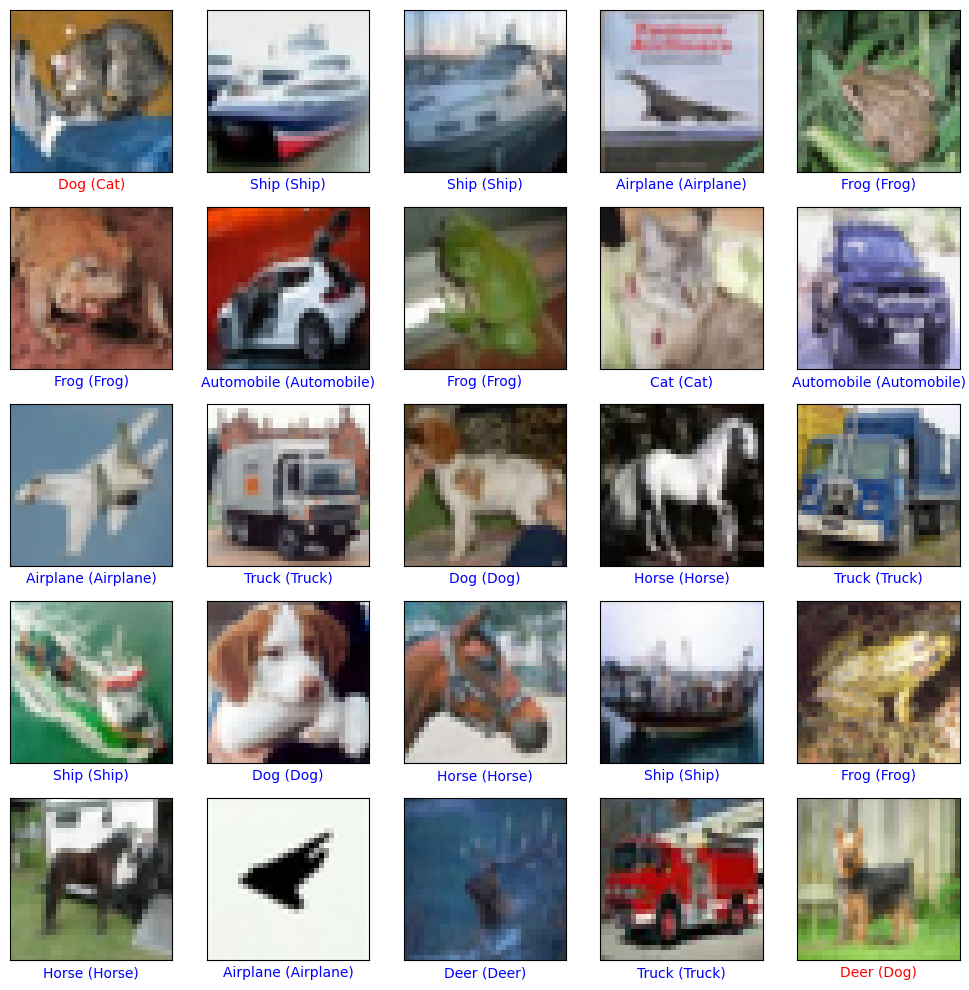

In [21]:
# Realizamos predicciones
predicciones = model.predict(x_test)

# Función para mostrar una imagen de prueba y la predicción del modelo
def mostrar_imagen(index, predicciones_array, etiqueta_real, imagen):
    prediccion, etiqueta_real, imagen = predicciones_array[index], etiqueta_real[index], imagen[index]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(imagen)

    etiqueta_predicha = np.argmax(prediccion)
    color = 'blue' if etiqueta_predicha == etiqueta_real else 'red'

    plt.xlabel(f"{class_names[etiqueta_predicha]} ({class_names[etiqueta_real[0]]})", color=color)

# Mostramos algunas predicciones
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2 * columnas, 2 * filas))
for i in range(num_imagenes):
    plt.subplot(filas, columnas, i + 1)
    mostrar_imagen(i, predicciones, y_test, x_test)
plt.tight_layout()
plt.show()
